# 06 Final Production

This notebook was my last - it incorporated the functions stored in my cleaner.py file, the cumulative research from the numerical and categorical filtering notebooks, and the trial and error gleaned from my first train/test notebook.  

All of the functions that I ran are commented out now to eliminate re-running them - this is for both brevity and the fact that my functions actually require responses via an "input()" line and I would not trouble my esteemed reader with making such decisions. The final make_model will run when this notebook is made because it corresponds to my best model. When given the prompt to "save" the image, have no fear if you choose to enter 'yes'. The image will automatically save named after the current timestamp, so you will not be overwriting anything in my repository.

#### Skip to the:  
[Best Model](#Best-Model)  
[Conclusion](#Conclusion)

In [2]:
from scipy.stats import ttest_ind
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import re
#week 3
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
#week 4
from sklearn.linear_model import LogisticRegression

#my .py file
import cleaner as cleaner

In [3]:
home = pd.read_csv('../datasets/train.csv')
home.columns = [col.lower().replace(' ', '_') for col in home.columns] #reformat df columns

### These are various feature combinations that I experimented with.  
The make_model() and save_test() functions are commented out for the benefit of the reader to streamline scrolling - the production model is at the bottom and will run if the page is run.

In [4]:
features = ['year_built', 'total_bsmt_sf', 'gr_liv_area', 'full_bath', 'lot_frontage',
           'mas_vnr_area', 'totrms_abvgrd', 'fireplaces', 'bsmtfin_sf_1', 'garage',
            'lot_area', 'wood_deck_sf', 'open_porch_sf', '2nd_flr_sf', 'bsmt_full_bath', 'half_bath',
           'liv_tot']
cat_features = ['ms_cat', 'bldg_type', 'st_cat', 'hs_cat', 'mas_cat', 'ex_cat', 'h_cat', 'k_cat', 'cen_cat', 'n_cat', 
                'overall_qual', 'nz']
all_feat = cat_features + features

In [5]:
#cleaner.make_model(home, all_feat, cat_features)

In [6]:
features = ['year_built', 'total_bsmt_sf', 'gr_liv_area', 'full_bath', 'lot_frontage',
           'mas_vnr_area', 'totrms_abvgrd', 'fireplaces', 'bsmtfin_sf_1', 'garage',
            'wood_deck_sf', 'open_porch_sf', '2nd_flr_sf', 'bsmt_full_bath', 'half_bath',
           'liv_tot']
cat_features = ['ms_cat', 'bldg_type', 'st_cat', 'hs_cat', 'mas_cat', 'ex_cat', 'h_cat', 'k_cat', 'cen_cat', 'n_cat', 
                'overall_qual', 'nz']
all_feat = cat_features + features
#cleaner.make_model(home, all_feat, cat_features)

In [7]:
features = ['year_built', 'total_bsmt_sf', 'gr_liv_area', 'full_bath', 'lot_frontage',
           'mas_vnr_area', 'totrms_abvgrd', 'fireplaces', 'bsmtfin_sf_1', 'garage',
            'wood_deck_sf', 'open_porch_sf', '2nd_flr_sf', 'bsmt_full_bath', 'half_bath']
cat_features = ['ms_cat', 'bldg_type', 'st_cat', 'hs_cat', 'mas_cat', 'ex_cat', 'h_cat', 'k_cat', 'cen_cat', 'n_cat', 
                'overall_qual', 'nz']
all_feat = cat_features + features
#cleaner.make_model(home, all_feat, cat_features)

In [8]:
features = ['year_built', 'total_bsmt_sf', 'gr_liv_area', 'full_bath', 'lot_area',
           'mas_vnr_area', 'totrms_abvgrd', 'fireplaces', 'bsmtfin_sf_1', 'garage',
            'wood_deck_sf', 'open_porch_sf', '2nd_flr_sf', 'bsmt_full_bath', 'half_bath']
cat_features = ['ms_cat', 'bldg_type', 'st_cat', 'hs_cat', 'mas_cat', 'ex_cat', 'h_cat', 'k_cat', 'cen_cat', 'n_cat', 
                'overall_qual', 'nz']
all_feat = cat_features + features
#cleaner.make_model(home, all_feat, cat_features)

In [9]:
features = ['year_built', 'total_bsmt_sf', 'gr_liv_area', 'full_bath', 'lot_area',
           'mas_vnr_area', 'totrms_abvgrd', 'fireplaces', 'bsmtfin_sf_1', 'garage',
            'wood_deck_sf', 'open_porch_sf', '2nd_flr_sf', 'bsmt_full_bath', 'half_bath', 'cen_cat']
cat_features = ['ms_cat', 'bldg_type', 'st_cat', 'hs_cat', 'mas_cat', 'ex_cat', 'h_cat', 'k_cat', 'n_cat', 
                'overall_qual', 'nz']
all_feat = cat_features + features
#cleaner.make_model(home, all_feat, cat_features)

In [10]:
features = ['year_built', 'total_bsmt_sf', 'gr_liv_area', 'full_bath', 'lot_area',
           'mas_vnr_area', 'totrms_abvgrd', 'fireplaces', 'bsmtfin_sf_1', 'garage',
            'wood_deck_sf', 'open_porch_sf', '2nd_flr_sf', 'bsmt_full_bath', 'half_bath', 'cen_cat']
cat_features = ['ms_cat', 'bldg_type', 'st_cat', 'hs_cat', 'mas_cat', 'ex_cat', 'h_cat', 'k_cat', 'n_cat', 
                'overall_qual']
all_feat = cat_features + features
#cleaner.make_model(home, all_feat, cat_features)

In [11]:
features = ['year_built', 'total_bsmt_sf', 'gr_liv_area', 'full_bath', 'lot_area',
           'mas_vnr_area', 'totrms_abvgrd', 'fireplaces', 'bsmtfin_sf_1', 'garage',
            'wood_deck_sf', 'open_porch_sf', '2nd_flr_sf', 'bsmt_full_bath', 'half_bath', 'cen_cat']
cat_features = ['ms_cat', 'bldg_type', 'st_cat', 'hs_cat', 'mas_cat', 'ex_cat', 'h_cat', 'k_cat', 'n_cat', 
                'overall_qual']
all_feat = cat_features + features
#cleaner.make_model(home, all_feat, cat_features)

In [12]:
features = ['overall_qual', 'year_built', 'total_bsmt_sf', 'gr_liv_area', 'full_bath', 'garage_area',
           'mas_vnr_area', 'totrms_abvgrd', 'fireplaces', 'bsmtfin_sf_1', 'oqual_gla', 'garage', 'liv_tot', 
            'lot_frontage', 'lot_area', 'wood_deck_sf', 'open_porch_sf', '2nd_flr_sf', 'bsmt_full_bath', 'half_bath']
cat_features = ['ms_cat', 'bldg_type', 'st_cat', 'hs_cat', 'mas_cat', 'ex_cat', 'h_cat', 'k_cat', 'cen_cat', 'n_cat']
all_feat = cat_features + features
#cleaner.make_model(home, all_feat, cat_features) #THIS IS MY BEST MODEL (ON KAGGLE) SO FAR (10/6)

In [13]:
features = ['overall_qual', 'year_built', 'total_bsmt_sf', 'gr_liv_area', 'full_bath', 'garage_area',
           'mas_vnr_area', 'totrms_abvgrd', 'fireplaces', 'bsmtfin_sf_1', 'oqual_gla', 'garage', 'liv_tot', 
            'lot_frontage', 'lot_area', 'wood_deck_sf', 'open_porch_sf', '2nd_flr_sf', 'bsmt_full_bath', 'half_bath']
cat_features = ['bldg_type', 'st_cat', 'hs_cat', 'mas_cat', 'ex_cat', 'h_cat', 'k_cat', 'cen_cat', 'nz'] #using nz instead of n_cat and ms
all_feat = cat_features + features
#cleaner.make_model(home, all_feat, cat_features)

In [14]:
features = ['overall_qual', 'year_built', 'total_bsmt_sf', 'gr_liv_area', 'full_bath', 'garage_area',
           'mas_vnr_area', 'totrms_abvgrd', 'fireplaces', 'bsmtfin_sf_1', 'oqual_gla', 'garage', 'liv_tot', 
            'lot_frontage', 'lot_area', 'wood_deck_sf', 'open_porch_sf', '2nd_flr_sf', 'bsmt_full_bath', 'half_bath']
cat_features = ['bldg_type', 'st_cat', 'hs_cat', 'mas_cat', 'ex_cat', 'h_cat', 'k_cat', 'cen_cat', 'nz'] #using nz instead of n_cat and ms
all_feat = cat_features + features
#cleaner.save_test(home, all_feat, cat_features)

In [15]:
features = ['overall_qual', 'year_built', 'total_bsmt_sf', 'gr_liv_area', 'full_bath', 'garage_area',
           'mas_vnr_area', 'totrms_abvgrd', 'fireplaces', 'bsmtfin_sf_1', 'oqual_gla', 'garage', 'liv_tot', 
            'lot_frontage', 'lot_area', 'wood_deck_sf', 'open_porch_sf', '2nd_flr_sf', 'bsmt_full_bath', 'half_bath']
cat_features = ['ms_cat', 'bldg_type', 'st_cat', 'hs_cat', 'mas_cat', 'ex_cat', 'h_cat', 'k_cat', 'cen_cat', 'n_cat']
all_feat = cat_features + features
#cleaner.save_test(home, all_feat, cat_features) #THIS IS MY BEST K SCORE TO DATE (20201006233328.350324 - RMSE 22986.486)

In [16]:
features = ['overall_qual', 'year_built', 'total_bsmt_sf', 'gr_liv_area', 'full_bath', 'garage_area',
           'mas_vnr_area', 'totrms_abvgrd', 'fireplaces', 'bsmtfin_sf_1', 'oqual_gla', 'garage', 'liv_tot', 
            'lot_frontage', 'lot_area', 'wood_deck_sf', 'open_porch_sf', '2nd_flr_sf', 'bsmt_full_bath', 'half_bath',
           'cen_cat', 'h_cat', 'k_cat', 'ex_cat']
#cat_features = ['bldg_type', 'st_cat', 'hs_cat', 'mas_cat', 'ex_cat', 'h_cat', 'k_cat', 'cen_cat', 'nz'] #using nz instead of n_cat and ms
all_feat = cat_features + features
#cleaner.make_model(home, all_feat, 0) #all numerical test including converted cat features

In [17]:
#cleaner.save_test(home, all_feat, 0)

## Best Model

### Again - when prompted by this function to enter "yes" or "no", feel free to enter either response. You are not in danger of overwriting anything, and you will get all the same metrics displayed either way.

Your training score is 0.9069301315221101
Your test score is 0.7919379449620012
Your cross val scores are [0.87648499 0.8977872  0.90223774 0.86810159 0.92034896]
Your mean cross val score is 0.8929920960944742


Save histogram? Please enter "yes" or "no". no


okay, not saved


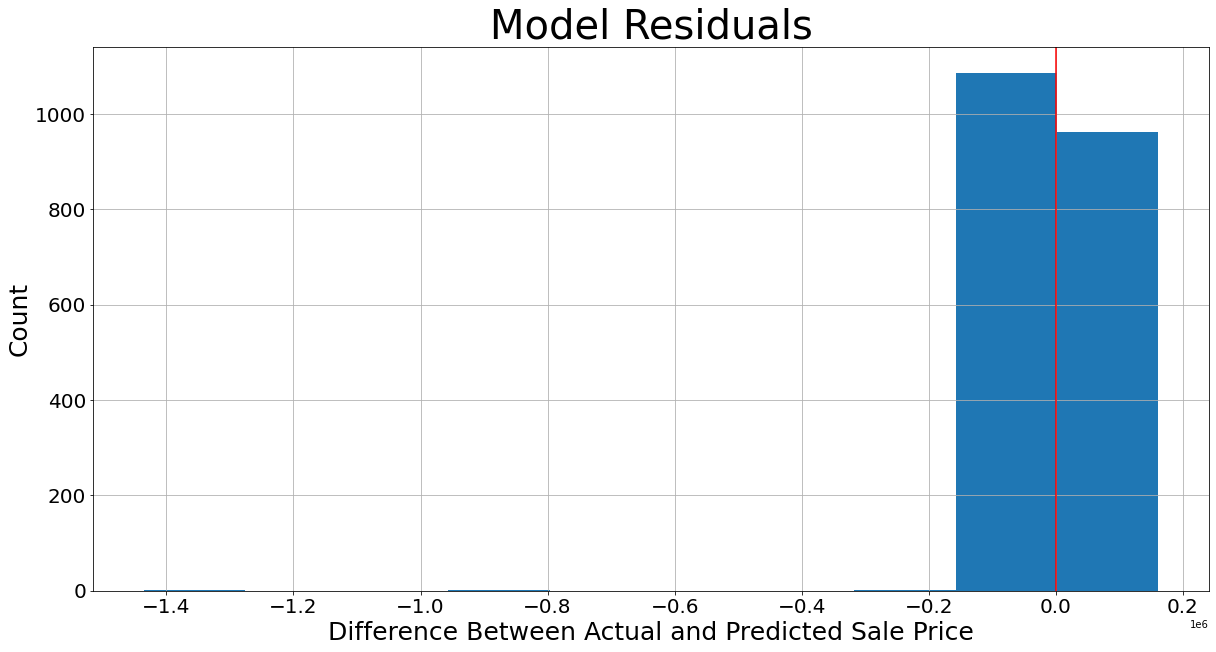

|                      |     coef |   coef_abs |
|:---------------------|---------:|-----------:|
| ms_cat_ms3           | 0.320036 |   0.320036 |
| ms_cat_other         | 0.304347 |   0.304347 |
| ms_cat_ms2           | 0.298745 |   0.298745 |
| ms_cat_ms4           | 0.276961 |   0.276961 |
| ex_cat_2             | 0.212645 |   0.212645 |
| k_cat_3              | 0.192331 |   0.192331 |
| h_cat_3              | 0.186971 |   0.186971 |
| h_cat_2              | 0.182866 |   0.182866 |
| ex_cat_1             | 0.174848 |   0.174848 |
| neighborhood_StoneBr | 0.138507 |   0.138507 |


'Your RMSE for test 2020-10-09 15:38:32.470927 is 43220.43296864446.'

In [18]:
features = ['overall_qual', 'year_built', 'total_bsmt_sf', 'gr_liv_area', 'full_bath', 'garage_area',
           'mas_vnr_area', 'totrms_abvgrd', 'fireplaces', 'bsmtfin_sf_1', 'oqual_gla', 'garage', 'liv_tot', 
            'lot_frontage', 'lot_area', 'wood_deck_sf', 'open_porch_sf', '2nd_flr_sf', 'bsmt_full_bath', 'half_bath']
cat_features = ['ms_cat', 'bldg_type', 'st_cat', 'hs_cat', 'mas_cat', 'ex_cat', 'h_cat', 'k_cat', 'cen_cat', 'neighborhood']
all_feat = cat_features + features #testing with neighborhood instead of n_cat
cleaner.make_model(home, all_feat, cat_features)

In [19]:
#cleaner.save_test(home, all_feat, cat_features) #new best, 10/7

That dropped me another 200 points on Kaggle! Test name "20201007190947.002019", RMSE score 22783.65

## Conclusion

It is evident from the coefficient table that Zoning, Kitchen Quality, Heating, External Condition, and to a lesser extent Neighborhood have important correlations to sale price that IOWANAHOME realtors would be wise to consider. By noting these features in potential homes for sale and encouraging selling clients to touch up these features, or by telling purchasing clients to prioritize these features with an eye on resale, the organization can bring a higher level of value and expertise to all of their business interactions.